# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [14]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [15]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [16]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        15:29:31   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

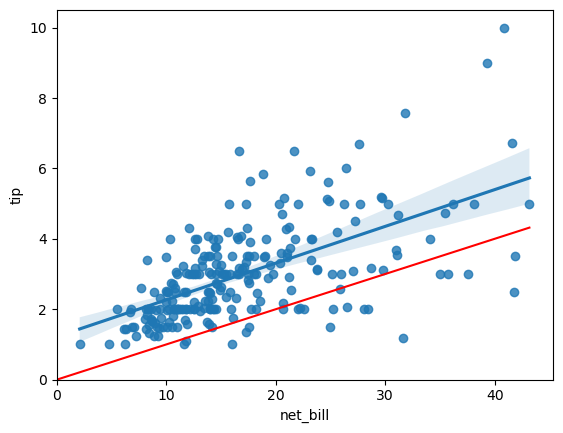

In [17]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [18]:
# Ajustando o modelo de regressão
X = sm.add_constant(tips['net_bill'])
y = tips['tip_pct']

model = sm.OLS(y, X).fit()

# Exibindo os resultados do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        15:29:37   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

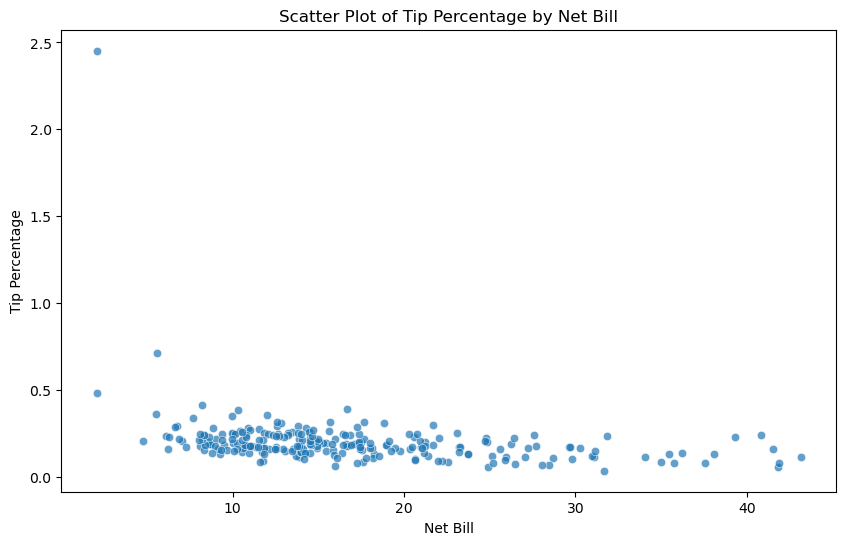

In [19]:
# Construindo o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.7)

# Adicionando rótulos e título
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Scatter Plot of Tip Percentage by Net Bill')

# Exibindo o gráfico
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

1. Da a quantidade de tip dada em valor. 2. da o porcentual dado.
O valor no primeiro aumenta segundo a quantidade de pessoas, mas isto justifica porque cada pessoa faz uma consumacao e no final paga gorjeta. No 2o vemos que o porcentual ele se mantem, ou seja, todos pagam approx 0,3% da conta, mas sendo mais pessoas a conta eh maior.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [21]:
# Obtendo os valores preditos para tip_pct
tips['pred_tip_pct'] = model.fittedvalues

In [22]:
# Obtendo os valores preditos para tip
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

In [24]:
# Calculando o R² para o modelo de tip_pct
r_squared_tip_pct = model.rsquared
print(f"R² para tip_pct: {r_squared_tip_pct}")

R² para tip_pct: 0.09129084920662933


In [25]:
# Calculando o R² para o modelo de tip
X_tip = sm.add_constant(tips['pred_tip_pct'])
y_tip = tips['tip']
model_tip = sm.OLS(y_tip, X_tip).fit()
r_squared_tip = model_tip.rsquared
print(f"R² para tip: {r_squared_tip}")

R² para tip: 0.3325407312323705


In [ ]:
1. R2 para o modelo de tip eh maior que o R2 para o modelo de tip_pct